In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target



In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

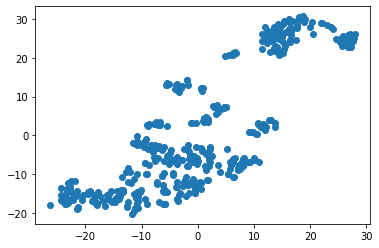

In [4]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

Задание 2

In [5]:
km = KMeans(n_clusters=3, random_state=42 , max_iter = 100)

km_model = km.fit(X_train)


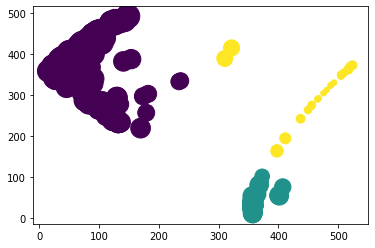

In [6]:
X_train_kmeans = km_model.fit_transform(X_train)

labels_train = km_model.fit_predict(X_train_kmeans)

plt.scatter(X_train_kmeans[:, 0],
            X_train_kmeans[:, 1],
            X_train_kmeans[:, 2], c=labels_train)


plt.show()

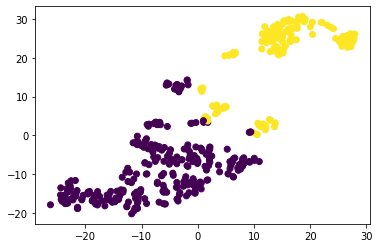

In [7]:
kmeans = KMeans(n_clusters=2, random_state=42 , max_iter = 100)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0],
            X_train_tsne[:, 1], c=labels_train)

plt.show()

In [8]:
print('price  Кластер 1: {}'.format(y_train[labels_train == 0].mean()))
print('CRIM   Кластер 1: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))

print('price  Кластер 2: {}'.format(y_train[labels_train == 1].mean()))
print('CRIM   Кластер 2: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))

price  Кластер 1: 26.066541353383457
CRIM   Кластер 1: 0.2766786090225563
price  Кластер 2: 16.493478260869566
CRIM   Кластер 2: 10.03253507246377


3 задание

In [9]:
km_model_pred = km_model.predict(X_test)


print('price  Кластер 1: {}'.format(y_test[labels_train == 0].mean()))
print('CRIM   Кластер 1: {}'.format(X_test.loc[labels_train == 0, 'CRIM'].mean()))

print('price  Кластер 2: {}'.format(y_test[labels_train == 1].mean()))
print('CRIM   Кластер 2: {}'.format(X_test.loc[labels_train == 1, 'CRIM'].mean()))

print('price  Кластер 3: {}'.format(y_test[labels_train == 2].mean()))
print('CRIM   Кластер 3: {}'.format(X_test.loc[labels_train == 2, 'CRIM'].mean()))

ValueError: Incorrect number of features. Got 13 features, expected 3